In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## MNIST handwriting - Neural Network

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Preprocessing

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

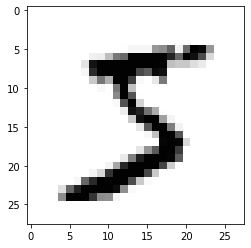

In [5]:
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [6]:
import sys
for x in X_train[0] :
    for i in x :
        sys.stdout.write(f'{i:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

#### Standardization as 0 ~ 1

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Dimensionality reduction

In [8]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

#### One-hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Processing

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
model = Sequential([
                    Dense(512, input_dim = 784, activation = 'relu'),
                    Dense(48, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 48)                24624     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                490       
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

#### Setting for model optimization

In [18]:
modelpath = '/content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5'
checkpoint = ModelCheckpoint(modelpath, verbose = 1, save_best_only = True)
earlystopping = EarlyStopping(patience = 20)

In [19]:
history = model.fit(
    X_train, Y_train, validation_split = 0.2, epochs = 50, batch_size = 200,
    verbose = 0, callbacks = [checkpoint, earlystopping]
)


Epoch 00001: val_loss improved from inf to 0.17056, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5

Epoch 00002: val_loss improved from 0.17056 to 0.11585, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5

Epoch 00003: val_loss improved from 0.11585 to 0.09527, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5

Epoch 00004: val_loss improved from 0.09527 to 0.08307, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5

Epoch 00005: val_loss improved from 0.08307 to 0.07971, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5

Epoch 00006: val_loss did not improve from 0.07971

Epoch 00007: val_loss did not improve from 0.07971

Epoch 00008: val_loss did not improve from 0.07971

Epoch 00009: val_loss improved from 0.07971 to 0.07586, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_mnist.h5

Epoch 00010: val_loss did not improve from 0.07586

Epoch 00011: va

In [20]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9806


[0.07071144878864288, 0.9805999994277954]

### Visualization

In [21]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

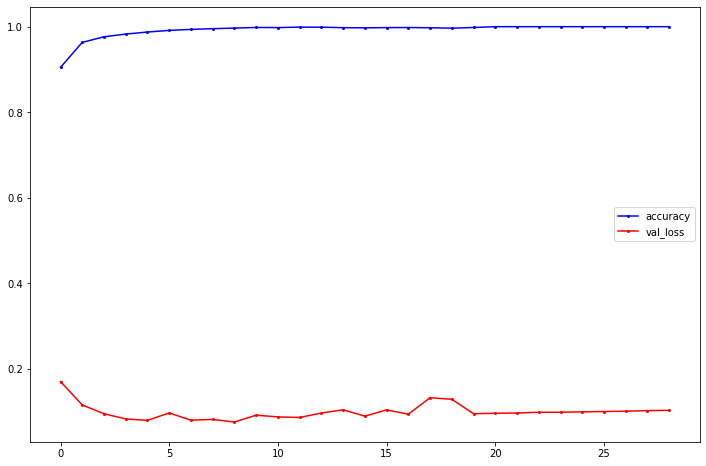

In [22]:
plt.figure(figsize = (12, 8))
plt.plot(x_len, y_acc, 'bo-', markersize = 2, label = 'accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize = 2, label = 'val_loss')
plt.legend()
plt.show()